In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score, precision_score, recall_score

# 0. Import MTurk labelled data

In [19]:
# import data
mturk_1 = pd.read_csv('./webisalod_data/webisa_0_sample_results.csv', sep=",",
                     header=None)
mturk_2 = pd.read_csv('./webisalod_data/webisa_1_sample_results.csv', sep=",",
                     header=None)
mturk_3 = pd.read_csv('./webisalod_data/webisa_2_sample_results.csv', sep=",",
                     header=None)
mturk_4 = pd.read_csv('./webisalod_data/webisa_3_sample_results.csv', sep=",",
                     header=None)
mturk_5 = pd.read_csv('./webisalod_data/webisa_5_sample_results.csv', sep=",",
                     header=None)
mturk_6 = pd.read_csv('./webisalod_data/webisa_10_sample_results.csv', sep=",",
                     header=None)
mturk_7 = pd.read_csv('./webisalod_data/webisa_20_sample_results.csv', sep=",",
                     header=None)

In [20]:
# stack data together

all_data = pd.concat([mturk_1, mturk_2, mturk_3,
                     mturk_4, mturk_5, mturk_6,
                     mturk_7])
all_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,516227103,7,big disappointment,1,1,1,NaN,7,NaN,big,disappointment,NaN,p8b;,rcgroups.com;,184109777;,no,1,3,5
1,54225214,ford model a,choice,1,1,1,ford model,a,NaN,NaN,choice,NaN,p8b;,athomemechanic.com;,411598690;,yes,5,0,4
2,502492695,0029 b,branched-chain c1-6alkyl,1,1,1,0029,b,NaN,branched-chain,c1-6alkyl,NaN,p8a;,faqs.org;,87210809;,uncertain,1,5,3
3,124467686,0019]x2,methylene b,1,1,1,NaN,0019]x2,NaN,methylene,b,NaN,p8a;,faqs.org;,58079142;,uncertain,1,5,3
4,344425380,colour accuracy,slight problem,2,1,2,colour,accuracy,NaN,slight,problem,NaN,p8b;,goodgearguide.com.au;idg.com.au;,19576496;19421634;,uncertain,2,3,4


In [21]:
# sanity check
all_data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
495,176464507,year,year,4374,50,2499,NaN,year,NaN,NaN,year,NaN,p7;p6;p5;p4;p2;p1;p42;p43;p29c;p30b;p15a;p20c;...,feedblitz.com;sd.gov;thehill.com;freegold.me;s...,57607875;203845564;237507225;33779068;43267736...,yes,6,0,3
496,190698478,year,government,119,23,95,NaN,year,NaN,NaN,government,NaN,p5;p2;p1;p12a;p8a;p8c;p8b;p43;p21a;p36;p34;p15...,theatlantic.com;irstaxattorney.com;abs.gov.au;...,383048141;3367265;41475487;236240644;175671157...,no,0,0,9
497,305259200,year,career,395,25,285,NaN,year,NaN,NaN,career,NaN,p2;p43;p26;p15a;p25;p24;p20c;p20b;p20d;p27b;p2...,insidecareerinfo.com;eurobasket.com;baseballth...,59738659;373095860;201341165;401373876;1950716...,no,0,0,9
498,454099429,year,marriage,97,21,80,NaN,year,NaN,NaN,marriage,NaN,p2;p10;p8d;p8a;p8b;p43;p21a;p36;p23d;p23a;p38;...,theartofsimple.net;voanews.com;uscis.gov;gerar...,231310077;190163110;159671727;396231981;586335...,no,1,1,7
499,456876573,year,employee,82,26,70,NaN,year,NaN,NaN,employee,NaN,p7;p6;p5;p4;p2;p1;p12a;p15a;p25;p24;p20c;p20b;...,lawnsite.com;glassdoor.ca;tribuneindia.com;bar...,244013938;355847341;190308611;179473240;394456...,no,0,1,8


In [22]:
# sanity check
all_data.shape

(3500, 19)

In [23]:
# reset index
all_data = all_data.reset_index(drop=True)

In [24]:
# sanity check
all_data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
3495,176464507,year,year,4374,50,2499,NaN,year,NaN,NaN,year,NaN,p7;p6;p5;p4;p2;p1;p42;p43;p29c;p30b;p15a;p20c;...,feedblitz.com;sd.gov;thehill.com;freegold.me;s...,57607875;203845564;237507225;33779068;43267736...,yes,6,0,3
3496,190698478,year,government,119,23,95,NaN,year,NaN,NaN,government,NaN,p5;p2;p1;p12a;p8a;p8c;p8b;p43;p21a;p36;p34;p15...,theatlantic.com;irstaxattorney.com;abs.gov.au;...,383048141;3367265;41475487;236240644;175671157...,no,0,0,9
3497,305259200,year,career,395,25,285,NaN,year,NaN,NaN,career,NaN,p2;p43;p26;p15a;p25;p24;p20c;p20b;p20d;p27b;p2...,insidecareerinfo.com;eurobasket.com;baseballth...,59738659;373095860;201341165;401373876;1950716...,no,0,0,9
3498,454099429,year,marriage,97,21,80,NaN,year,NaN,NaN,marriage,NaN,p2;p10;p8d;p8a;p8b;p43;p21a;p36;p23d;p23a;p38;...,theartofsimple.net;voanews.com;uscis.gov;gerar...,231310077;190163110;159671727;396231981;586335...,no,1,1,7
3499,456876573,year,employee,82,26,70,NaN,year,NaN,NaN,employee,NaN,p7;p6;p5;p4;p2;p1;p12a;p15a;p25;p24;p20c;p20b;...,lawnsite.com;glassdoor.ca;tribuneindia.com;bar...,244013938;355847341;190308611;179473240;394456...,no,0,1,8


In [25]:
# rename columns
all_data.columns = ['id', 'instance', 'class', 'frequency',
                    'pidspread', 'pldspread', 'ipremod', 'ilemma',
                    'ipostmod', 'cpremod', 'clemma', 'cpostmod', 'pids',
                    'plds', 'provids', 'majority voting',
                    'yes', 'uncertain', 'no']

In [26]:
all_data['majority voting'].value_counts()

no           2398
yes           725
uncertain     377
Name: majority voting, dtype: int64

# 1. calculate for all but uncertain

In [10]:
# subset all_data to all without uncertain
data_wo_uncertain = all_data[all_data['majority voting'] != 'uncertain'].reset_index(drop=True)
data_wo_uncertain.shape

(3123, 19)

In [11]:
# include column with all positive predictions 
data_wo_uncertain['ml_prediction'] = np.repeat(1, len(data_wo_uncertain))

In [12]:
# numerical columns of mturk label
data_wo_uncertain['mturk'] = data_wo_uncertain['majority voting'].apply(lambda x: 1 if x == 'yes' else 0)
data_wo_uncertain.head()

,id,instance,class,frequency,pidspread,pldspread,ipremod,ilemma,ipostmod,cpremod,...,cpostmod,pids,plds,provids,majority voting,yes,uncertain,no,ml_prediction,mturk
0,516227103,7,big disappointment,1,1,1,NaN,7,NaN,big,...,NaN,p8b;,rcgroups.com;,184109777;,no,1,3,5,1,0
1,54225214,ford model a,choice,1,1,1,ford model,a,NaN,NaN,...,NaN,p8b;,athomemechanic.com;,411598690;,yes,5,0,4,1,1
2,270852864,advance in the southeastern,stocker cattle,1,1,1,NaN,advance,in the southeastern,stocker,...,NaN,p23b;,livestockweekly.com;,27861768;,no,0,3,6,1,0
3,369033327,railey added,great start for me,1,1,1,railey,added,NaN,great,...,for me,p8b;,thedailysail.com;,237477977;,no,0,3,6,1,0
4,516170918,super corrupt administration,"huge failure,period",1,1,1,super corrupt,administration,NaN,huge,...,NaN,p8c;,cnn.com;,12417510;,yes,7,0,2,1,1


In [13]:
# sanity check
data_wo_uncertain.mturk.value_counts()

0    2398
1     725
Name: mturk, dtype: int64

In [14]:
# calculate goldstandard precision
precision_score(data_wo_uncertain.mturk, data_wo_uncertain.ml_prediction)

0.23214857508805636

In [15]:
# calculate goldstandard recall
recall_score(data_wo_uncertain.mturk, data_wo_uncertain.ml_prediction)

1.0

In [16]:
# calculate goldstandard f1
f1_score(data_wo_uncertain.mturk, data_wo_uncertain.ml_prediction)

0.3768191268191268

# 2. Single baselines


In [36]:
# loop through all mturks

for dataset in [mturk_1, mturk_2, mturk_3, mturk_4, mturk_5, mturk_6, mturk_7]:
    
    # copy data to not modify original
    compare = dataset.copy()
    
    # rename columns
    compare.columns = ['id', 'instance', 'class', 'frequency',
                    'pidspread', 'pldspread', 'ipremod', 'ilemma',
                    'ipostmod', 'cpremod', 'clemma', 'cpostmod', 'pids',
                    'plds', 'provids', 'majority voting',
                    'yes', 'uncertain', 'no']
    
    # subset data
    compare = compare[compare['majority voting'] != 'uncertain']
    
    # get column with yes true
    compare['ml_label'] = np.repeat(1, len(compare))
    
    # get column of goldstandard
    compare['goldstandard'] = compare['majority voting'].apply(lambda x: 1 if x == 'yes' else 0)
    
    # precision
    print('Precision {}'.format(precision_score(compare['goldstandard'], compare['ml_label'])))
    
    # recall
    print('Recall {}'.format(recall_score(compare['goldstandard'], compare['ml_label'])))
    
    # f1
    print('F1 {}'.format(f1_score(compare['goldstandard'], compare['ml_label'])))
    
    print('---------------------------------------------------------------------')

Precision 0.08851674641148326
Recall 1.0
F1 0.16263736263736264
---------------------------------------------------------------------
Precision 0.2235294117647059
Recall 1.0
F1 0.36538461538461536
---------------------------------------------------------------------
Precision 0.23595505617977527
Recall 1.0
F1 0.38181818181818183
---------------------------------------------------------------------
Precision 0.23448275862068965
Recall 1.0
F1 0.37988826815642457
---------------------------------------------------------------------
Precision 0.21739130434782608
Recall 1.0
F1 0.3571428571428571
---------------------------------------------------------------------
Precision 0.2484076433121019
Recall 1.0
F1 0.3979591836734694
---------------------------------------------------------------------
Precision 0.3603411513859275
Recall 1.0
F1 0.5297805642633229
---------------------------------------------------------------------


# 3. Calculate Baseline prediction for three class problem during training (5-fold stratified cross validation)

110,625 instances are obtained for each class -> calculate baseline macro f1 score

In [2]:
# generate label array
labels = [0] * 110625
labels.extend([1]*110625)
labels.extend([2]*110625)

In [3]:
# sanity check
len(labels)

331875

In [7]:
# get array with naive prediction
naive_prediction = [0] * len(labels)

In [8]:
# calculate macro f1
f1_score(labels, naive_prediction, average='macro')

0.16666666666666666

# 4. Get pids

In [17]:
data_wo_uncertain.head()

,id,instance,class,frequency,pidspread,pldspread,ipremod,ilemma,ipostmod,cpremod,...,cpostmod,pids,plds,provids,majority voting,yes,uncertain,no,ml_prediction,mturk
0,516227103,7,big disappointment,1,1,1,NaN,7,NaN,big,...,NaN,p8b;,rcgroups.com;,184109777;,no,1,3,5,1,0
1,54225214,ford model a,choice,1,1,1,ford model,a,NaN,NaN,...,NaN,p8b;,athomemechanic.com;,411598690;,yes,5,0,4,1,1
2,270852864,advance in the southeastern,stocker cattle,1,1,1,NaN,advance,in the southeastern,stocker,...,NaN,p23b;,livestockweekly.com;,27861768;,no,0,3,6,1,0
3,369033327,railey added,great start for me,1,1,1,railey,added,NaN,great,...,for me,p8b;,thedailysail.com;,237477977;,no,0,3,6,1,0
4,516170918,super corrupt administration,"huge failure,period",1,1,1,super corrupt,administration,NaN,huge,...,NaN,p8c;,cnn.com;,12417510;,yes,7,0,2,1,1


In [30]:
# get column names
train = pd.read_csv('/media/linda/INTENSO/9_FINAL/data/machine_learning/two_class/count-based/train/downsampled_count_train.csv', sep=";")
X_train_one_hot = train.drop(['Unnamed: 0','instance', 'class', 'frequency', 'pidspread', 'pldspread', 'id', 'pids', 'label'], axis=1)

In [31]:
# get columns
columns = X_train_one_hot.columns
len(columns)

58

In [32]:
print(columns)

Index(['p1', 'p10', 'p11', 'p12a', 'p12b', 'p12c', 'p13', 'p14', 'p15a',
       'p15b', 'p16', 'p2', 'p20a', 'p20b', 'p20c', 'p20d', 'p21a', 'p21b',
       'p21c', 'p21d', 'p22a', 'p22b', 'p23a', 'p23b', 'p23c', 'p23d', 'p23e',
       'p24', 'p25', 'p26', 'p27a', 'p27b', 'p28a', 'p28b', 'p28c', 'p28d',
       'p29a', 'p29c', 'p30a', 'p30b', 'p31a', 'p31b', 'p34', 'p36', 'p37',
       'p38', 'p39', 'p3a', 'p4', 'p42', 'p43', 'p5', 'p6', 'p7', 'p8a', 'p8b',
       'p8c', 'p8d'],
      dtype='object')


In [18]:
data_wo_uncertain[data_wo_uncertain['frequency'] > 1]

,id,instance,class,frequency,pidspread,pldspread,ipremod,ilemma,ipostmod,cpremod,...,cpostmod,pids,plds,provids,majority voting,yes,uncertain,no,ml_prediction,mturk
8,395418232,amount of mechanical handling,number of factor,2,1,2,NaN,amount,of mechanical handling,NaN,...,of factor,p3a;,google.com;google.es;,302270364;303686477;,no,3,1,5,1,0
9,47551857,another,game-time decision,2,1,2,NaN,another,NaN,game-time,...,NaN,p8a;,bulls101.com;sportsmedia101.com;,348670317;349454224;,no,2,2,5,1,0
19,28179192,attribute,object subtype,2,1,2,NaN,attribute,NaN,object,...,NaN,p8a;,metacpan.org;cpan.org;,446043662;445966187;,no,2,1,6,1,0
21,16144109,australia,model for a region,2,1,1,NaN,australia,NaN,NaN,...,for a region,p5;,bravenewclimate.com;,235608956;243179689;,yes,5,1,3,1,1
29,371619168,basis of caprolactam,amine as chain regulator,2,1,2,NaN,basis,of caprolactam,NaN,...,as chain regulator,p8a;,google.com;patentgenius.com;,430021816;121333806;,no,0,3,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3118,176464507,year,year,4374,50,2499,NaN,year,NaN,NaN,...,NaN,p7;p6;p5;p4;p2;p1;p42;p43;p29c;p30b;p15a;p20c;...,feedblitz.com;sd.gov;thehill.com;freegold.me;s...,57607875;203845564;237507225;33779068;43267736...,yes,6,0,3,1,1
3119,190698478,year,government,119,23,95,NaN,year,NaN,NaN,...,NaN,p5;p2;p1;p12a;p8a;p8c;p8b;p43;p21a;p36;p34;p15...,theatlantic.com;irstaxattorney.com;abs.gov.au;...,383048141;3367265;41475487;236240644;175671157...,no,0,0,9,1,0
3120,305259200,year,career,395,25,285,NaN,year,NaN,NaN,...,NaN,p2;p43;p26;p15a;p25;p24;p20c;p20b;p20d;p27b;p2...,insidecareerinfo.com;eurobasket.com;baseballth...,59738659;373095860;201341165;401373876;1950716...,no,0,0,9,1,0
3121,454099429,year,marriage,97,21,80,NaN,year,NaN,NaN,...,NaN,p2;p10;p8d;p8a;p8b;p43;p21a;p36;p23d;p23a;p38;...,theartofsimple.net;voanews.com;uscis.gov;gerar...,231310077;190163110;159671727;396231981;586335...,no,1,1,7,1,0


In [34]:
# export data
data_wo_uncertain_small = data_wo_uncertain[['id', 'mturk']]
data_wo_uncertain_small.to_csv('./webisalod_data/goldstandard_raw.csv', sep=";")

# 5. Analyze goldstandard

In [5]:
# read goldstandard without label
goldstandard_wo_label=pd.read_csv('./webisalod_data/goldstandard_with_pids.csv', sep=";")
del goldstandard_wo_label['Unnamed: 0']
goldstandard_wo_label.head()

,_id,instance,class,frequency,pidspread,pldspread,modifications
0,141663461,b1,waveform,3,2,3,['p34p8a']
1,147713771,adjective,also,3,2,3,['p34p2']
2,270852864,advance,cattle,1,1,1,['p23b']
3,516170918,administration,"failure,period",1,1,1,['p8c']
4,387574181,agnium,planet,1,1,1,['p8a']


In [6]:
# get labels
labels = pd.read_csv('./webisalod_data/goldstandard_raw.csv', sep=";")
del labels['Unnamed: 0']
labels.head()

,id,mturk
0,516227103,0
1,54225214,1
2,270852864,0
3,369033327,0
4,516170918,1


In [9]:
labels.columns = ['_id', 'label']

In [10]:
# merge data with labels
goldstandard = pd.merge(goldstandard_wo_label, labels)
goldstandard.head()

,_id,instance,class,frequency,pidspread,pldspread,modifications,label
0,141663461,b1,waveform,3,2,3,['p34p8a'],0
1,147713771,adjective,also,3,2,3,['p34p2'],0
2,270852864,advance,cattle,1,1,1,['p23b'],0
3,516170918,administration,"failure,period",1,1,1,['p8c'],1
4,387574181,agnium,planet,1,1,1,['p8a'],0


In [11]:
# sanity check
goldstandard.shape

(139, 8)

In [13]:
goldstandard.head(50)

,_id,instance,class,frequency,pidspread,pldspread,modifications,label
0,141663461,b1,waveform,3,2,3,['p34p8a'],0
1,147713771,adjective,also,3,2,3,['p34p2'],0
2,270852864,advance,cattle,1,1,1,['p23b'],0
3,516170918,administration,"failure,period",1,1,1,['p8c'],1
4,387574181,agnium,planet,1,1,1,['p8a'],0
5,125471954,alam,may,1,1,1,['p3a'],0
6,493745276,alaska,with,5,3,4,['p5p2p25'],0
7,134062544,anthology,member,19,4,19,"['p8a', 'p8a', 'p1', 'p8b', 'p8a', 'p8a', 'p8b...",0
8,501384948,aristocracy,few,2,2,2,['p23bp8c'],0
9,447336728,barber,tourism,2,1,1,['p5'],0


In [14]:
#calculate fraction of found hypernyms in goldstandard
5/139

0.03597122302158273

In [17]:
# calculate number of found hypernyms overall
120246/(120246+6842160)

0.017270753816999468

In [18]:
# filter goldstandard to hypernym label
goldstandard[goldstandard.label == 1]

,_id,instance,class,frequency,pidspread,pldspread,modifications,label
3,516170918,administration,"failure,period",1,1,1,['p8c'],1
16,105870566,caesar,emperors,3,3,3,['p5p23cp3a'],1
56,63424816,locality,identification,3,2,3,['p5p3a'],1
93,139132257,photobucket,editing,9,3,9,"['p5', 'p5p8a', 'p5', 'p4']",1
97,209693125,pub,orhave,1,1,1,['p4'],1


In [28]:
# sanity checks
all_data[all_data.id==516170918]

,id,instance,class,frequency,pidspread,pldspread,ipremod,ilemma,ipostmod,cpremod,clemma,cpostmod,pids,plds,provids,majority voting,yes,uncertain,no
8,516170918,super corrupt administration,"huge failure,period",1,1,1,super corrupt,administration,NaN,huge,"failure,period",NaN,p8c;,cnn.com;,12417510;,yes,7,0,2


In [29]:
# sanity checks
all_data[all_data.id==105870566]

,id,instance,class,frequency,pidspread,pldspread,ipremod,ilemma,ipostmod,cpremod,clemma,cpostmod,pids,plds,provids,majority voting,yes,uncertain,no
1056,105870566,julius caesar,emperors,3,3,3,julius,caesar,NaN,NaN,emperors,NaN,p5;p23c;p3a;,hostelworld.com;psychic-delia.com;wordpress.com;,34709553;191358866;22092812;,yes,7,0,2


In [30]:
# sanity checks
all_data[all_data.id==63424816]

,id,instance,class,frequency,pidspread,pldspread,ipremod,ilemma,ipostmod,cpremod,clemma,cpostmod,pids,plds,provids,majority voting,yes,uncertain,no
750,63424816,locality,identification,3,2,3,NaN,locality,NaN,NaN,identification,NaN,p5;p3a;,consumered.com;statewatch.org;azag.gov;,22640311;303678870;320305521;,yes,5,1,3


In [31]:
# sanity checks
all_data[all_data.id==139132257]

,id,instance,class,frequency,pidspread,pldspread,ipremod,ilemma,ipostmod,cpremod,clemma,cpostmod,pids,plds,provids,majority voting,yes,uncertain,no
348,139132257,photobucket,online photo editing,1,1,1,NaN,photobucket,NaN,online photo,editing,NaN,p4;,wacom.com;,316380244;,yes,7,0,2


In [32]:
# sanity checks
all_data[all_data.id==209693125]

,id,instance,class,frequency,pidspread,pldspread,ipremod,ilemma,ipostmod,cpremod,clemma,cpostmod,pids,plds,provids,majority voting,yes,uncertain,no
371,209693125,pub,place selling alcohol orhave,1,1,1,NaN,pub,NaN,place selling alcohol,orhave,NaN,p4;,lawstuff.org.au;,185415558;,yes,6,0,3


In [ ]:
all_data.ren

In [34]:
# get former data with voting
all_data_interesting = all_data[['id', 'instance', 'class', 'majority voting', 'yes', 'uncertain', 'no']]
all_data_interesting.rename(columns={'id': '_id',
                                     'instance': 'instance_mturk',
                                     'class': 'class_mturk'}, inplace=True)
all_data_interesting.head()

,_id,instance_mturk,class_mturk,majority voting,yes,uncertain,no
0,516227103,7,big disappointment,no,1,3,5
1,54225214,ford model a,choice,yes,5,0,4
2,502492695,0029 b,branched-chain c1-6alkyl,uncertain,1,5,3
3,124467686,0019]x2,methylene b,uncertain,1,5,3
4,344425380,colour accuracy,slight problem,uncertain,2,3,4


In [35]:
# get goldstandard stuff
goldstandard_all = pd.merge(all_data_interesting, goldstandard,
                           how='right', left_on='_id', right_on='_id')
goldstandard_all.shape

(139, 14)

In [36]:
goldstandard_all.head()

,_id,instance_mturk,class_mturk,majority voting,yes,uncertain,no,instance,class,frequency,pidspread,pldspread,modifications,label
0,270852864,advance in the southeastern,stocker cattle,no,0,3,6,advance,cattle,1,1,1,['p23b'],0
1,516170918,super corrupt administration,"huge failure,period",yes,7,0,2,administration,"failure,period",1,1,1,['p8c'],1
2,387574181,agnium,planet orbit the sun,no,1,3,5,agnium,planet,1,1,1,['p8a'],0
3,125471954,nsf president shah alam,may,no,0,4,5,alam,may,1,1,1,['p3a'],0
4,134062544,combustion anthology for manhattan,member of the dramatistsguild,no,1,3,5,anthology,member,19,4,19,"['p8a', 'p8a', 'p1', 'p8b', 'p8a', 'p8a', 'p8b...",0


In [37]:
# rename columns for easy identification
goldstandard_all.rename(columns = {'instance': 'instance_web',
                                  'class': 'class_web'}, inplace=True)


In [43]:
# sort by label
goldstandard_all.sort_values(by='label', ascending=False, inplace=True)

In [44]:
# sort by label
goldstandard_all.reset_index(drop=True, inplace=True)
goldstandard_all.head()

,_id,instance_mturk,class_mturk,majority voting,yes,uncertain,no,instance_web,class_web,frequency,pidspread,pldspread,modifications,label
0,516170918,super corrupt administration,"huge failure,period",yes,7,0,2,administration,"failure,period",1,1,1,['p8c'],1
1,139132257,photobucket,online photo editing,yes,7,0,2,photobucket,editing,9,3,9,"['p5', 'p5p8a', 'p5', 'p4']",1
2,105870566,julius caesar,emperors,yes,7,0,2,caesar,emperors,3,3,3,['p5p23cp3a'],1
3,209693125,pub,place selling alcohol orhave,yes,6,0,3,pub,orhave,1,1,1,['p4'],1
4,63424816,locality,identification,yes,5,1,3,locality,identification,3,2,3,['p5p3a'],1


In [121]:
goldstandard_all[['_id', 'instance_mturk', 'class_mturk', 'majority voting',
                 'yes', 'uncertain', 'no', 'instance_web', 'class_web',
                 'frequency', 'pidspread','pldspread', 'label']].head()

,_id,instance_mturk,class_mturk,majority voting,yes,uncertain,no,instance_web,class_web,frequency,pidspread,pldspread,label
0,516170918,super corrupt administration,"huge failure,period",yes,7,0,2,administration,"failure,period",1,1,1,1
1,139132257,photobucket,online photo editing,yes,7,0,2,photobucket,editing,9,3,9,1
2,105870566,julius caesar,emperors,yes,7,0,2,caesar,emperors,3,3,3,1
3,209693125,pub,place selling alcohol orhave,yes,6,0,3,pub,orhave,1,1,1,1
4,63424816,locality,identification,yes,5,1,3,locality,identification,3,2,3,1


In [45]:
# export data
goldstandard_all.to_csv('./webisalod_data/goldstandard_with_all_information.csv', sep=";")

# 5. Analyze Goldstandards together

In [104]:
# get counts of goldstandard
get_n_gold = [len(goldstandard_all)]
get_n_gold.extend(list(goldstandard_all['majority voting'].value_counts().values))

In [105]:
get_n_gold

[139, 134, 5]

In [54]:
# get yes, uncertain & no for 1 
# yes_class = goldstandard_all[goldstandard_all['label'] == 1]
mean_votes_all_data = goldstandard_all[['yes','uncertain', 'no', 'majority voting']]
mean_votes = mean_votes_all_data.groupby('majority voting').mean().reset_index()
mean_votes

,majority voting,yes,uncertain,no
0,no,0.5,1.156716,7.343284
1,yes,6.4,0.200000,2.400000


In [66]:
# get overall mean
last_observation = ['All']
last_observation.extend(list(mean_votes_all_data.mean().values))

In [67]:
last_observation

['All', 0.7122302158273381, 1.1223021582733812, 7.16546762589928]

In [68]:
# put observation as first row
mean_votes.loc[-1] = last_observation  # adding a row
mean_votes.index = mean_votes.index + 1  # shifting index
mean_votes.sort_index(inplace=True) 
mean_votes

,majority voting,yes,uncertain,no
0,All,0.71223,1.122302,7.165468
1,no,0.50000,1.156716,7.343284
2,yes,6.40000,0.200000,2.400000


In [102]:
# get counts
count_all = all_data[['yes','uncertain', 'no', 'majority voting']]
count_all = count_all[count_all['majority voting'] != 'uncertain']
get_n_all = [len(count_all)]
get_n_all.extend(list(count_all['majority voting'].value_counts().values))

In [103]:
get_n_all

[3123, 2398, 725]

In [74]:
# get contrast with all data
all_data_means = all_data[['yes','uncertain', 'no', 'majority voting']]
all_data_means = all_data_means[all_data_means['majority voting'] != 'uncertain']
all_data_means.shape

(3123, 4)

In [75]:
# get means
all_data_means = all_data_means.groupby(by='majority voting').mean().reset_index()
all_data_means

,majority voting,yes,uncertain,no
0,no,0.880734,0.690158,7.428691
1,yes,6.557241,0.480000,1.962759


In [78]:
# get overall mean
last_observation = ['All_MTurk']
last_observation.extend(list(all_data_means.mean().values))

In [79]:
last_observation

['All_MTurk', 3.718987662132237, 0.5850792326939116, 4.695724598084611]

In [82]:
# put observation as first row
all_data_means.loc[-1] = last_observation  # adding a row
all_data_means.index = all_data_means.index + 1  # shifting index
all_data_means.sort_index(inplace=True) 
all_data_means

,majority voting,yes,uncertain,no
0,All_MTurk,3.718988,0.585079,4.695725
1,no,0.880734,0.690158,7.428691
2,yes,6.557241,0.480000,1.962759


In [85]:
def if_else(x):
    if x == 'no':
        return 'no_MTurk'
    elif x == 'yes':
        return 'yes_MTurk'
    else:
        return x
all_data_means['majority voting'] = all_data_means['majority voting'].apply(lambda x: if_else(x))
all_data_means

,majority voting,yes,uncertain,no
0,All_MTurk,3.718988,0.585079,4.695725
1,no_MTurk,0.880734,0.690158,7.428691
2,yes_MTurk,6.557241,0.480000,1.962759


In [109]:
get_n_gold

[139, 134, 5, 3123, 2398, 725]

In [86]:
# concat data together
pie_data = pd.concat([mean_votes, all_data_means]).reset_index(drop=True)
pie_data

,majority voting,yes,uncertain,no
0,All,0.712230,1.122302,7.165468
1,no,0.500000,1.156716,7.343284
2,yes,6.400000,0.200000,2.400000
3,All_MTurk,3.718988,0.585079,4.695725
4,no_MTurk,0.880734,0.690158,7.428691
5,yes_MTurk,6.557241,0.480000,1.962759


In [114]:
# get n as new column
del pie_data['n']

In [88]:
# change majority voting
pie_data.rename(columns={'majority voting': 'class'}, inplace=True)

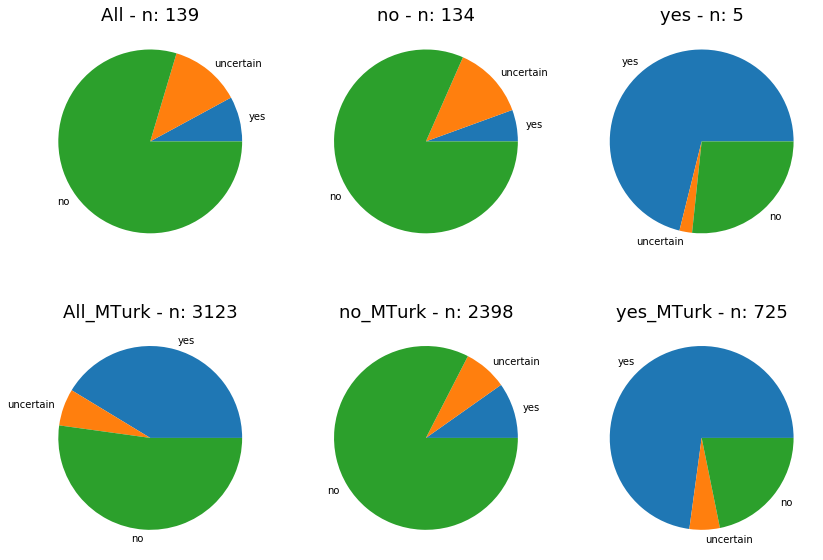

In [117]:
# change pie charts
fig, axes = plt.subplots(2, 3, figsize=(14, 10))

for i, (idx, row) in enumerate(pie_data.set_index('class').iterrows()):
    ax = axes[i // 3, i % 3]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, labels=row.index, startangle=0)
    title = ' - n: '.join([idx, str(get_n_gold[i])])
    ax.set_title(title, fontsize=18)

fig.subplots_adjust(wspace=.2)

# 6. Analyze pids

In [134]:
# calculate mean per frequencies
mean_frequencies = goldstandard_all[['frequency', 'majority voting']]
mean_frequencies = mean_frequencies.groupby(by='majority voting').mean().reset_index()
mean_frequencies

,majority voting,frequency
0,no,3.052239
1,yes,3.400000


In [135]:
# add all frequency mean to dataframe
mean_frequencies.loc[-1] = ['All', goldstandard_all['frequency'].mean()]  # adding a row
mean_frequencies.index = mean_frequencies.index + 1  # shifting index
mean_frequencies.sort_index(inplace=True) 
mean_frequencies

,majority voting,frequency
0,All,3.064748
1,no,3.052239
2,yes,3.400000


In [136]:
# get kpi as column
mean_frequencies['KPI'] = ['Frequency'] * 3
mean_frequencies

,majority voting,frequency,KPI
0,All,3.064748,Frequency
1,no,3.052239,Frequency
2,yes,3.400000,Frequency


In [137]:
# calculate mean per pidspread
mean_pidspread = goldstandard_all[['pidspread', 'majority voting']]
mean_pidspread = mean_pidspread.groupby(by='majority voting').mean().reset_index()
mean_pidspread

,majority voting,pidspread
0,no,1.664179
1,yes,2.000000


In [138]:
# add all pidspread mean to dataframe
mean_pidspread.loc[-1] = ['All', goldstandard_all['pidspread'].mean()]  # adding a row
mean_pidspread.index = mean_pidspread.index + 1  # shifting index
mean_pidspread.sort_index(inplace=True) 
mean_pidspread

,majority voting,pidspread
0,All,1.676259
1,no,1.664179
2,yes,2.000000


In [141]:
mean_pidspread['KPI'] = ['Pidspread'] * 3

In [139]:
# calculate mean per pldspread
mean_pldspread = goldstandard_all[['pldspread', 'majority voting']]
mean_pldspread = mean_pldspread.groupby(by='majority voting').mean().reset_index()
mean_pldspread

,majority voting,pldspread
0,no,2.731343
1,yes,3.400000


In [140]:
# add all pidspread mean to dataframe
mean_pldspread.loc[-1] = ['All', goldstandard_all['pldspread'].mean()]  # adding a row
mean_pldspread.index = mean_pldspread.index + 1  # shifting index
mean_pldspread.sort_index(inplace=True) 
mean_pldspread

,majority voting,pldspread
0,All,2.755396
1,no,2.731343
2,yes,3.400000


In [142]:
mean_pldspread['KPI'] = ['Pldspread'] * 3

In [146]:
# rename columns
mean_frequencies.columns = ['label', 'value', 'KPI']
mean_pldspread.columns = ['label', 'value', 'KPI']
mean_pidspread.columns = ['label', 'value', 'KPI']

In [147]:
# data to display
data = pd.concat([mean_frequencies, mean_pidspread, mean_pldspread]).reset_index(drop=True)

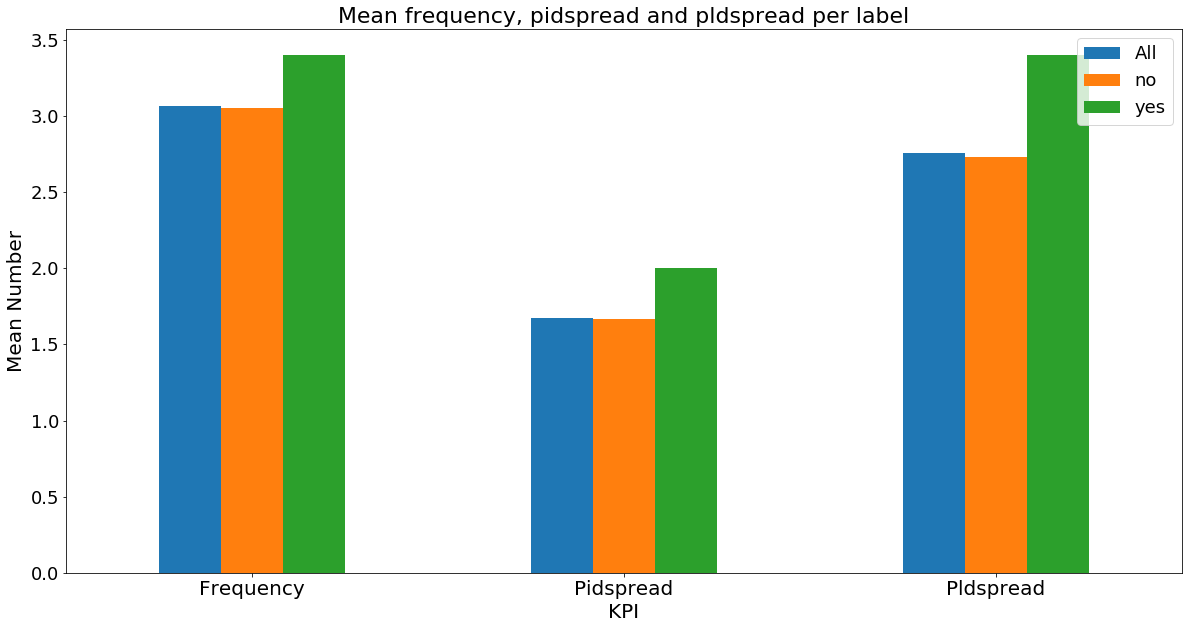

In [162]:
data.pivot('KPI', 'label', 'value').plot(kind='bar', figsize=(20,10), fontsize=18)
plt.xlabel('KPI', fontsize=20)
plt.xticks(fontsize=20, rotation=0)
plt.ylabel('Mean Number', fontsize=20)
plt.title('Mean frequency, pidspread and pldspread per label', fontsize=22)
plt.legend(fontsize=18, loc='upper right')
plt.show()

# 7. get count of Frequencies as sum for Goldstandard

In [163]:
# load data
count = pd.read_csv('./webisalod_data/goldstandard_count.csv', sep=";")
del count['Unnamed: 0']

In [164]:
count.head()

,_id,instance,class,frequency,pidspread,pldspread,modifications,p1,p10,p11,...,p4,p42,p43,p5,p6,p7,p8a,p8b,p8c,p8d
0,141663461,b1,waveform,3,2,3,['p34p8a'],0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,147713771,adjective,also,3,2,3,['p34p2'],0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,270852864,advance,cattle,1,1,1,['p23b'],0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,516170918,administration,"failure,period",1,1,1,['p8c'],0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,387574181,agnium,planet,1,1,1,['p8a'],0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [165]:
count.shape

(139, 65)

In [167]:
# get labels
labels = goldstandard_all[['_id', 'label']]

In [168]:
# get label
count = pd.merge(count, labels)
count

,_id,instance,class,frequency,pidspread,pldspread,modifications,p1,p10,p11,...,p42,p43,p5,p6,p7,p8a,p8b,p8c,p8d,label
0,141663461,b1,waveform,3,2,3,['p34p8a'],0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,147713771,adjective,also,3,2,3,['p34p2'],0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,270852864,advance,cattle,1,1,1,['p23b'],0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,516170918,administration,"failure,period",1,1,1,['p8c'],0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,387574181,agnium,planet,1,1,1,['p8a'],0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,420639686,unlock,motivator,2,1,2,"['p8a', 'p8a']",0,0,0,...,0,0,0,0,0,2,0,0,0,0
135,199660983,venue,odds,3,3,3,['p7p5p1'],1,0,0,...,0,0,1,0,1,0,0,0,0,0
136,218064825,venezuelum,however,5,2,5,['p2p3a'],0,0,0,...,0,0,0,0,0,0,0,0,0,0
137,89573263,your,alena,2,1,2,"['p8a', 'p8a']",0,0,0,...,0,0,0,0,0,2,0,0,0,0


In [169]:
# get label as ifelse column
count['label'] = np.where(count['label']==1, 'yes', 'no')
count

,_id,instance,class,frequency,pidspread,pldspread,modifications,p1,p10,p11,...,p42,p43,p5,p6,p7,p8a,p8b,p8c,p8d,label
0,141663461,b1,waveform,3,2,3,['p34p8a'],0,0,0,...,0,0,0,0,0,1,0,0,0,no
1,147713771,adjective,also,3,2,3,['p34p2'],0,0,0,...,0,0,0,0,0,0,0,0,0,no
2,270852864,advance,cattle,1,1,1,['p23b'],0,0,0,...,0,0,0,0,0,0,0,0,0,no
3,516170918,administration,"failure,period",1,1,1,['p8c'],0,0,0,...,0,0,0,0,0,0,0,1,0,yes
4,387574181,agnium,planet,1,1,1,['p8a'],0,0,0,...,0,0,0,0,0,1,0,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,420639686,unlock,motivator,2,1,2,"['p8a', 'p8a']",0,0,0,...,0,0,0,0,0,2,0,0,0,no
135,199660983,venue,odds,3,3,3,['p7p5p1'],1,0,0,...,0,0,1,0,1,0,0,0,0,no
136,218064825,venezuelum,however,5,2,5,['p2p3a'],0,0,0,...,0,0,0,0,0,0,0,0,0,no
137,89573263,your,alena,2,1,2,"['p8a', 'p8a']",0,0,0,...,0,0,0,0,0,2,0,0,0,no


In [172]:
# delete unnecessary columns for visualizations
del count['_id']
del count['instance']
del count['class']
del count['frequency']
del count['pidspread']
del count['pldspread']
del count['modifications']
sum_patterns = count.groupby(by='label').sum().reset_index()
sum_patterns

,label,p1,p10,p11,p12a,p12b,p12c,p13,p14,p15a,...,p4,p42,p43,p5,p6,p7,p8a,p8b,p8c,p8d
0,no,10,2,0,4,0,1,0,0,0,...,3,0,4,30,0,2,88,32,24,8
1,yes,0,0,0,0,0,0,0,0,0,...,2,0,0,5,0,0,1,0,1,0


In [173]:
# only get no's and yes
no = sum_patterns[sum_patterns['label'] == 'no']
yes = sum_patterns[sum_patterns['label'] == 'yes']

In [174]:
# delete label and transpose data
del no['label']
no = no.T
no

,0
p1,10
p10,2
p11,0
p12a,4
p12b,0
p12c,1
p13,0
p14,0
p15a,0
p15b,1


In [176]:
no.reset_index(inplace =True)
no.columns = ['Pattern', 'Count']
no.sort_values(by='Count', inplace=True, ascending=False)
no

,Pattern,Count
54,p8a,88
55,p8b,32
47,p3a,30
51,p5,30
56,p8c,24
11,p2,15
0,p1,10
42,p34,9
28,p25,9
57,p8d,8


In [177]:
# delete label and transpose data
del yes['label']
yes = yes.T

In [178]:
yes.reset_index(inplace =True)
yes.columns = ['Pattern', 'Count']
yes.sort_values(by='Count', inplace=True, ascending=False)

In [188]:
# top 10 yes
yes_10 = yes.head(6)

In [193]:
# top 10 no
no_10 = no.head(10)

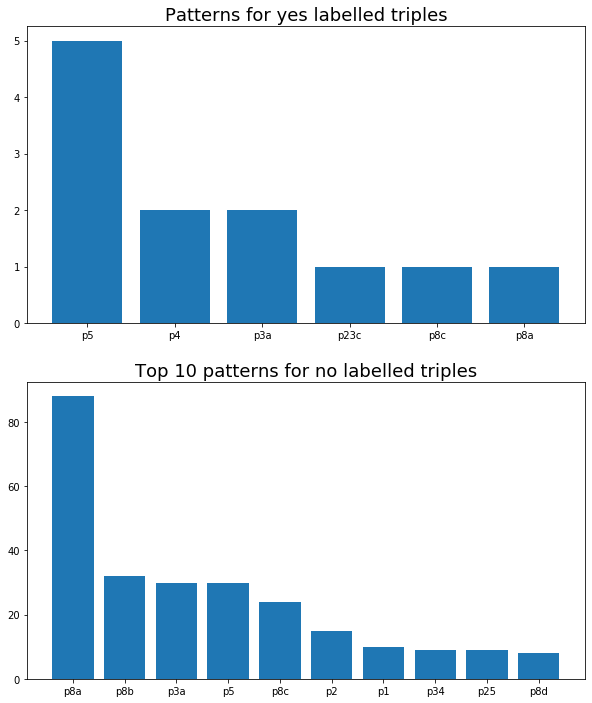

In [196]:
# display results in two bar charts
fig, (ax0,ax1) = plt.subplots(nrows=2, ncols=1, figsize=(10,12))
#ax0, ax1 = axes.flat

ax0.bar(yes_10["Pattern"], yes_10['Count'])
ax0.set_title('Patterns for yes labelled triples', fontsize=18)

ax1.bar(no_10["Pattern"], no_10['Count'])
ax1.set_title('Top 10 patterns for no labelled triples', fontsize=18)

plt.draw()